# Text-Mining Assignment

1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

# 1. Import Libraries

In [3]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [4]:
import re
import nltk
import spacy
import codecs
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

# 2. Multi-page web-scraping

In [5]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}


# Looping through multiple pages

In [6]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [7]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [8]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/product-reviews/B0B574QXFL/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

# Save results to a Dataframe, then export as CSV

In [9]:
df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,Reviewed in India on 12 August 2021
1,4.0 out of 5 stars\nEverything is very good ex...,4.0,"Drawbacks•Let's know this first, which is not ...",Reviewed in India on 10 December 2023
2,5.0 out of 5 stars\n.,5.0,It has a great quality and the built features ...,Reviewed in India on 22 January 2024
3,5.0 out of 5 stars\nBest watch,5.0,Speaker sound nice and so many new things upgr...,Reviewed in India on 4 February 2024
4,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,Reviewed in India on 17 May 2022
5,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,Reviewed in India on 16 December 2021
6,5.0 out of 5 stars\nVery good value for money.,5.0,Very good value for money.,Reviewed in India on 3 February 2024
7,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,Reviewed in India on 9 August 2022
8,4.0 out of 5 stars\nGood watch wake gaster is ...,4.0,Only two problem.1 not remove main watch face ...,Reviewed in India on 2 February 2024
9,4.0 out of 5 stars\nLove the colour .,4.0,Cute and beautiful watch for little girls who ...,Reviewed in India on 2 February 2024


In [10]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)

In [11]:
df.head(50)

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
1,4.0 out of 5 stars\nEverything is very good ex...,4.0,"Drawbacks•Let's know this first, which is not ...",10 December 2023
2,5.0 out of 5 stars\n.,5.0,It has a great quality and the built features ...,22 January 2024
3,5.0 out of 5 stars\nBest watch,5.0,Speaker sound nice and so many new things upgr...,4 February 2024
4,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
5,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,16 December 2021
6,5.0 out of 5 stars\nVery good value for money.,5.0,Very good value for money.,3 February 2024
7,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
8,4.0 out of 5 stars\nGood watch wake gaster is ...,4.0,Only two problem.1 not remove main watch face ...,2 February 2024
9,4.0 out of 5 stars\nLove the colour .,4.0,Cute and beautiful watch for little girls who ...,2 February 2024


In [12]:
df.to_csv("BoatSmartWatch_Review.csv")

# 3. Load Dataset

In [13]:
reviews = pd.read_csv('BoatSmartWatch_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
1,4.0 out of 5 stars\nEverything is very good ex...,4.0,"Drawbacks•Let's know this first, which is not ...",10 December 2023
2,5.0 out of 5 stars\n.,5.0,It has a great quality and the built features ...,22 January 2024
3,5.0 out of 5 stars\nBest watch,5.0,Speaker sound nice and so many new things upgr...,4 February 2024
4,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
5,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,16 December 2021
6,5.0 out of 5 stars\nVery good value for money.,5.0,Very good value for money.,3 February 2024
7,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
8,4.0 out of 5 stars\nGood watch wake gaster is ...,4.0,Only two problem.1 not remove main watch face ...,2 February 2024
9,4.0 out of 5 stars\nLove the colour .,4.0,Cute and beautiful watch for little girls who ...,2 February 2024


# 4. Data Exploration

In [14]:
reviews.Rating.describe()

count    10.000000
mean      4.200000
std       0.788811
min       3.000000
25%       4.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: Rating, dtype: float64

In [15]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        10 non-null     object 
 1   Rating       10 non-null     float64
 2   Review       10 non-null     object 
 3   Review_Date  10 non-null     object 
dtypes: float64(1), object(3)
memory usage: 452.0+ bytes


In [16]:
reviews.isna().sum()

Title          0
Rating         0
Review         0
Review_Date    0
dtype: int64

In [17]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
1,4.0 out of 5 stars\nEverything is very good ex...,4.0,"Drawbacks•Let's know this first, which is not ...",10 December 2023
2,5.0 out of 5 stars\n.,5.0,It has a great quality and the built features ...,22 January 2024
3,5.0 out of 5 stars\nBest watch,5.0,Speaker sound nice and so many new things upgr...,4 February 2024
4,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022


# 5. Data Visualization

# Date vs Review Count

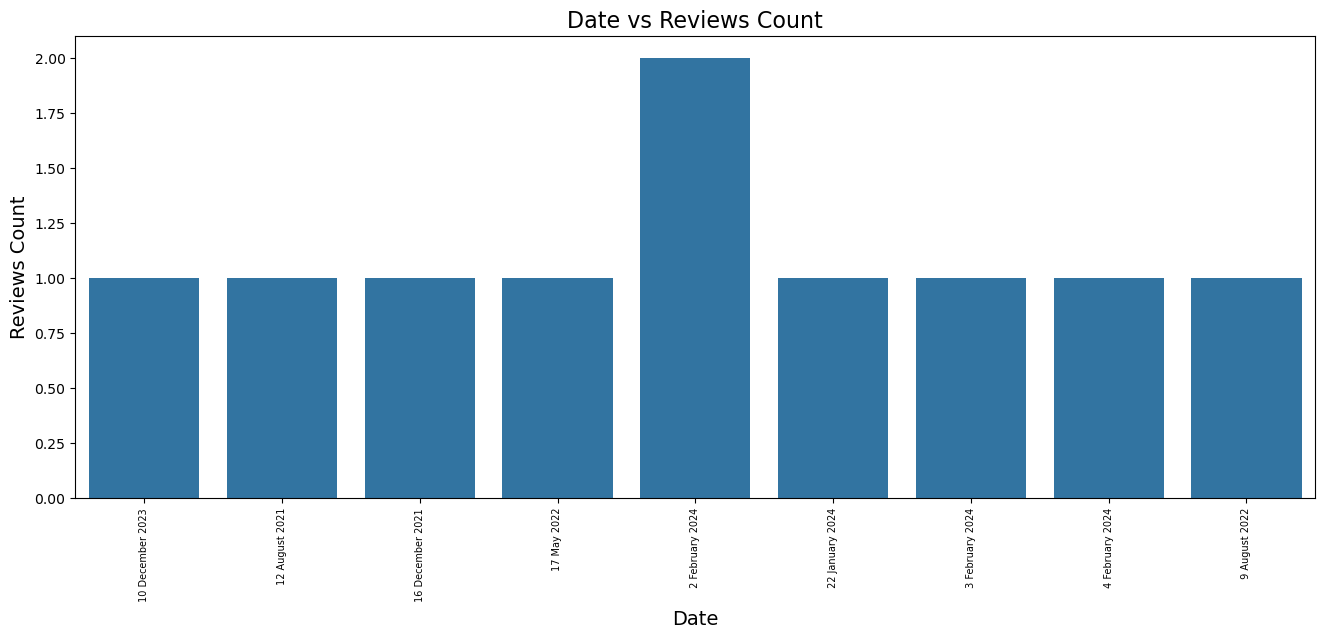

In [18]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

# Percentage of Ratings

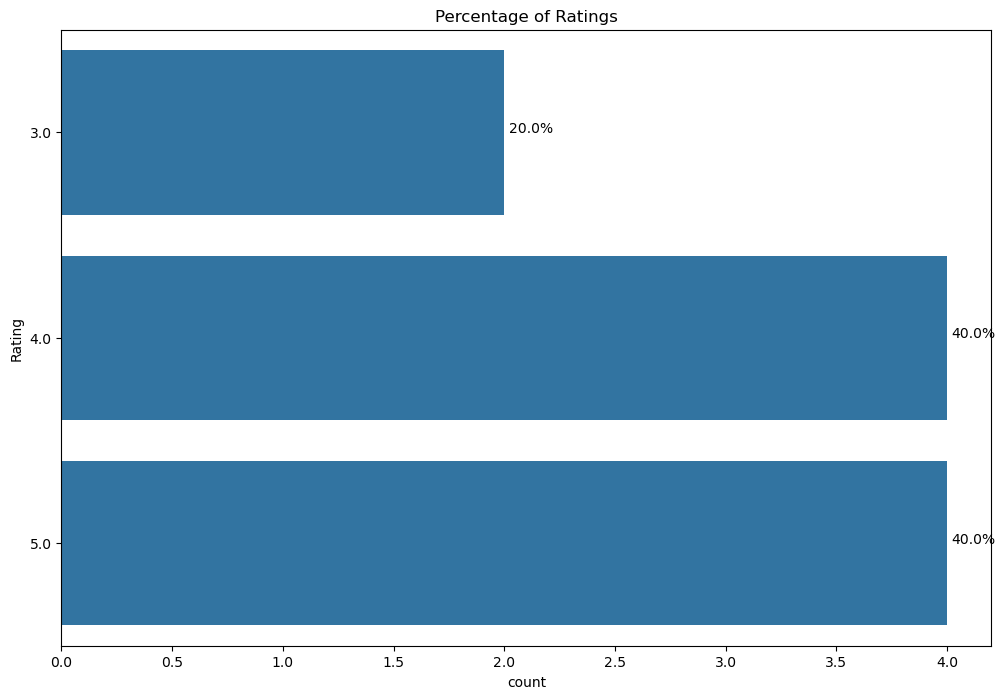

In [19]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

# 6. BasicText Preprocessing for Sentiment Analysis

# Spelling Correction

In [20]:
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    The media could not be loaded.\n              ...
1    Drawback•Met's know this first, which is not m...
2    It has a great quality and the built features ...
3    Speaker sound nice and so many new things upgr...
4    Review OverviewAverage2.The Coat today launche...
Name: Review, dtype: object

In [21]:
boat_review = reviews[['Review']]
boat_review

,Review
0,The media could not be loaded.\n ...
1,"Drawbacks•Let's know this first, which is not ..."
2,It has a great quality and the built features ...
3,Speaker sound nice and so many new things upgr...
4,Review OverviewAverage2.7The Boat today launch...
5,Pros:1. Premium build quality with matte finis...
6,Very good value for money.
7,Skipping the parts mostly covered in other rev...
8,Only two problem.1 not remove main watch face ...
9,Cute and beautiful watch for little girls who ...


# Resetting index

In [22]:
boat_review.reset_index(drop=True, inplace=True)

In [23]:
stop_words = stopwords.words('english')
boat_review['Review'] = boat_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))

# Lemmatizer

In [24]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(boat_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", boat_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/10 [00:00<?, ?it/s]

In [25]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": boat_review.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
1,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."
2,great quality built feature good also waterpro...,it great quality built features good also wate...
3,speaker sound nice many new thing upgraded ver...,speaker sound nice many new things upgraded ve...
4,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...


# 7. Text Pre-processing Techniques
# A. Removing '@names'

In [26]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [27]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
1,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."
2,great quality built feature good also waterpro...,it great quality built features good also wate...
3,speaker sound nice many new thing upgraded ver...,speaker sound nice many new things upgraded ve...
4,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
5,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
6,good value money,very good value money.
7,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
8,two problem remove main watch face deleting on...,only two problem.1 remove main watch face dele...
9,cute beautiful watch little girl love flaunt w...,cute beautiful watch little girls loves flaunt...


# B. Removing links (http | https)

In [28]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
1,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."
2,great quality built feature good also waterpro...,it great quality built features good also wate...
3,speaker sound nice many new thing upgraded ver...,speaker sound nice many new things upgraded ve...
4,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
5,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
6,good value money,very good value money.
7,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
8,two problem remove main watch face deleting on...,only two problem.1 remove main watch face dele...
9,cute beautiful watch little girl love flaunt w...,cute beautiful watch little girls loves flaunt...


# C. Removing Review with empty text

In [29]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
1,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."
2,great quality built feature good also waterpro...,it great quality built features good also wate...
3,speaker sound nice many new thing upgraded ver...,speaker sound nice many new things upgraded ve...
4,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
5,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
6,good value money,very good value money.
7,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
8,two problem remove main watch face deleting on...,only two problem.1 remove main watch face dele...
9,cute beautiful watch little girl love flaunt w...,cute beautiful watch little girls loves flaunt...


# D. Dropping duplicate rows

In [30]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
1,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."
2,great quality built feature good also waterpro...,it great quality built features good also wate...
3,speaker sound nice many new thing upgraded ver...,speaker sound nice many new things upgraded ve...
4,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
5,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
6,good value money,very good value money.
7,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
8,two problem remove main watch face deleting on...,only two problem.1 remove main watch face dele...
9,cute beautiful watch little girl love flaunt w...,cute beautiful watch little girls loves flaunt...


# E. Function to remove emoji

In [31]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [32]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
1,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."
2,great quality built feature good also waterpro...,it great quality built features good also wate...
3,speaker sound nice many new thing upgraded ver...,speaker sound nice many new things upgraded ve...
4,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
5,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
6,good value money,very good value money.
7,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
8,two problem remove main watch face deleting on...,only two problem.1 remove main watch face dele...
9,cute beautiful watch little girl love flaunt w...,cute beautiful watch little girls loves flaunt...


# F. Removing Stop words

In [33]:
with codecs.open(r"C:\Users\t5498nk\Desktop\NAVANEETH KADALOORI\DATA SCIENCE\Text Mining\stop.txt",encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [34]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [35]:
my_stop_words = stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
1,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."
2,great quality built feature good also waterpro...,it great quality built features good also wate...
3,speaker sound nice many new thing upgraded ver...,speaker sound nice many new things upgraded ve...
4,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
5,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
6,good value money,very good value money.
7,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
8,two problem remove main watch face deleting on...,only two problem.1 remove main watch face dele...
9,cute beautiful watch little girl love flaunt w...,cute beautiful watch little girls loves flaunt...


# G. Tokenize 'Clean_Reviews'

In [36]:
pip install --user -U nltk

Note: you may need to restart the kernel to use updated packages.


In [37]:
import nltk
nltk.download('punkt')

from nltk import word_tokenize,sent_tokenize
TextBlob(dataframe['Clean_Reviews'][1]).words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\t5498nk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


WordList(['drawback', 'let', 'know', 'first', 'much', 'st', 'delivery', 'late', 'almost', 'month', 'ordering', 'product', 'guess', 'may', 'due', 'great', 'sale', 'offer', 'going', 'time', 'second', 'problem', 'watch', 'battery', 'life', 'mentioned', 'description', 'go', 'day', 'right', 'continue', 'day', 'actually', 'use', 'see', 'time', 'use', 'apps', 'feature', 'much', 'otherwise', 'hardly', 'live', 'day', 'beginning', 'benefitsnow', 'main', 'part', 'st', 'though', 'delivery', 'late', 'good', 'well', 'protected', 'secondly', 'featuresthis', 'boat', 'xtend', 'smartwatch', 'really', 'good', 'handy', 'tech', 'savvy', 'person', 'download', 'boat', 'wave', 'app', 'connect', 'device', 'bluetooth', 'better', 'app', 'set', 'personalize', 'everything', 'app', 'health', 'data', 'almost', 'accurate', 'keep', 'track', 'well', 'well', 'includes', 'step', 'count', 'calorie', 'burn', 'stress', 'level', 'bp', 'oxygen', 'level', 'even', 'menstruation', 'cycle', 'give', 'weekly', 'health', 'report', '

In [38]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [medium, could, loaded, used, watch, month, bo...
1    [drawback, let, know, first, much, st, deliver...
2    [great, quality, built, feature, good, also, w...
3    [speaker, sound, nice, many, new, thing, upgra...
4    [review, overviewaverage, boat, today, launche...
5    [pro, premium, build, quality, matte, finishin...
6                                 [good, value, money]
7    [skipping, part, mostly, covered, review, spon...
8    [two, problem, remove, main, watch, face, dele...
9    [cute, beautiful, watch, little, girl, love, f...
Name: Clean_Reviews, dtype: object

In [39]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo..."
1,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver...","[drawback, let, know, first, much, st, deliver..."
2,great quality built feature good also waterpro...,it great quality built features good also wate...,"[great, quality, built, feature, good, also, w..."
3,speaker sound nice many new thing upgraded ver...,speaker sound nice many new things upgraded ve...,"[speaker, sound, nice, many, new, thing, upgra..."
4,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche..."
5,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...,"[pro, premium, build, quality, matte, finishin..."
6,good value money,very good value money.,"[good, value, money]"
7,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon..."
8,two problem remove main watch face deleting on...,only two problem.1 remove main watch face dele...,"[two, problem, remove, main, watch, face, dele..."
9,cute beautiful watch little girl love flaunt w...,cute beautiful watch little girls loves flaunt...,"[cute, beautiful, watch, little, girl, love, f..."


# H. Converting words to Stemmer

In [40]:
stemmer = SnowballStemmer("english")

In [41]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,medium could load use watch month bought first...
1,drawback let know first much st deliveri late ...
2,great qualiti built featur good also waterproo...
3,speaker sound nice mani new thing upgrad version
4,review overviewaverag boat today launch boat x...
5,pro premium build qualiti matt finish sturdi p...
6,good valu money
7,skip part most cover review sponsor yt one add...
8,two problem remov main watch face delet one sl...
9,cute beauti watch littl girl love flaunt watch


# I. Converting words to Lemma

In [42]:
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

,stemmed
0,medium could loaded used watch month bought fi...
1,drawback let know first much st delivery late ...
2,great quality built feature good also waterpro...
3,speaker sound nice many new thing upgraded ver...
4,review overviewaverage boat today launched boa...
5,pro premium build quality matte finishing stur...
6,good value money
7,skipping part mostly covered review sponsored ...
8,two problem remove main watch face deleting on...
9,cute beautiful watch little girl love flaunt w...


# 8. Basic Feature Extaction
# A. Applying bag of Words without N grams

In [43]:
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [44]:
print(cv.get_feature_names_out()[109:200])

['bt' 'budget' 'bug' 'build' 'buildi' 'built' 'bulb' 'burn' 'burnt'
 'button' 'buy' 'buying' 'cable' 'cache' 'calculated' 'calculating'
 'calculation' 'calculator' 'call' 'called' 'caller' 'calling' 'calorie'
 'calory' 'cals' 'camera' 'cannot' 'carddesign' 'care' 'case' 'category'
 'change' 'changed' 'charger' 'charging' 'charm' 'cheap' 'check'
 'checking' 'childish' 'chinese' 'claim' 'classic' 'clean' 'clear'
 'clearing' 'clearly' 'click' 'clipuser' 'clone' 'close' 'cloud' 'color'
 'colour' 'colourcharging' 'combi' 'come' 'comfortable'
 'comfortdisplaywatch' 'comfortwhen' 'coming' 'command' 'common' 'company'
 'compared' 'complain' 'complaining' 'completely' 'con' 'configuration'
 'configure' 'connect' 'connected' 'connecting' 'connectivity' 'connects'
 'considerably' 'construction' 'contact' 'content' 'contentboat'
 'contentdesign' 'contentsbox' 'contentsmartwatch' 'continue' 'continuous'
 'continuously' 'control' 'controlled' 'convenient' 'conversation']


In [45]:
print(cv.get_feature_names_out()[:100])

['absolutely' 'ac' 'accept' 'acceptable' 'acceptance' 'accepts' 'access'
 'accidentally' 'account' 'accuracy' 'accuracybatteryyou'
 'accuracycomparing' 'accurate' 'accurately' 'activate' 'activating'
 'active' 'activites' 'activity' 'actual' 'actually' 'adapter' 'add'
 'added' 'addition' 'adjust' 'advertised' 'aggregate' 'alarm' 'alert'
 'alexa' 'allowed' 'almost' 'also' 'aluminium' 'always' 'amaze' 'amazfit'
 'amazon' 'amount' 'analog' 'android' 'angle' 'animation' 'anniversary'
 'another' 'answer' 'anything' 'anywhere' 'aod' 'apart' 'app'
 'appaccuracyaccuracy' 'appaccuracybatteryfinal' 'apple' 'apps' 'appyou'
 'around' 'aside' 'asks' 'aspect' 'assistant' 'assisted' 'atm' 'attached'
 'attaching' 'attention' 'attractive' 'auto' 'available' 'average' 'away'
 'back' 'background' 'badge' 'band' 'bank' 'bar' 'based' 'basic' 'battery'
 'beautiful' 'bed' 'beginning' 'believe' 'benefitsnow' 'best' 'better'
 'beyond' 'bezel' 'big' 'bip' 'bit' 'black' 'bloated' 'bluetooth' 'boat'
 'body' 'both

In [46]:
print(tweetscv.toarray()[100:200])

[]


# B. CountVectorizer with N-grams (Bigrams & Trigrams)

In [47]:
dataframe = dataframe.reset_index(drop=True)

In [48]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/10 [00:00<?, ?it/s]

In [49]:
corpus[3]

'speaker sound nice mani new thing upgrad version'

# Applying Countvectorizer (Creating the Bag of Words model)

In [50]:
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [51]:
X.shape

(10, 1546)

In [52]:
cv.get_feature_names_out()[:20]

array(['absolut', 'accept', 'access', 'accur', 'accuraci',
       'accuraci sleep', 'accuraci sleep track', 'activ', 'activ includ',
       'actual', 'ad', 'add', 'alarm', 'alarm timer', 'alert', 'alexa',
       'alexa support', 'alexa watch', 'alexa work', 'almost'],
      dtype=object)

In [53]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [54]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df

,absolut,accept,access,accur,accuraci,accuraci sleep,accuraci sleep track,activ,activ includ,actual,...,work well,worri,would,would recommend,would recommend go,wrist,xtend,xtend smartwatch,xtend watch,ye
0,0,0,0,3,1,1,1,3,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,0,0,1,0,0,0,2,1,1,...,0,0,0,0,0,0,1,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,4,3,0,0,1,1,0,...,0,1,4,2,2,0,20,7,1,1
5,1,3,0,3,1,1,1,0,0,1,...,2,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,1,0,1,0,0,6,0,1,...,0,0,0,0,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# C. TF-IDF Vectorizer

In [55]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/10 [00:00<?, ?it/s]

In [56]:
corpus[4]

'review overviewaverag boat today launch boat xtend compani latest budget smartwatch price tag r boat xtend smartwatch come stylish design resembl appl watch moreov built amazon alexa support spo track stress track much come budget segment worth buy smartwatch queri noth worri detail review boat xtend smartwatch clear doubt contentsbox contentdesign build comfortdisplaywatch ui featuresalexa supportwatch facesboat wave appaccuracybatteryfin wordsbuy box contentboat xtend box contentsmartwatch black gold colourcharg clipus manual warranti carddesign build comfortwhen buy smartwatch one alway think design look apart featur design build anoth major aspect one take care buy smartwatch boat work design time bring premium side term look design inspir appl watch cannot compar obvious everi aspect appl watch would much better boat xtend smartwatch redmi watch well amazfit bip u pro shape design build qualiti much premium one boat xtend design buildi person like color scheme boat xtend smartwat

# Applying TF-IDF Vectorizer

In [57]:
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [58]:
X.shape

(10, 1546)

In [59]:
tfidf_v.get_feature_names_out()[:20]

array(['absolut', 'accept', 'access', 'accur', 'accuraci',
       'accuraci sleep', 'accuraci sleep track', 'activ', 'activ includ',
       'actual', 'ad', 'add', 'alarm', 'alarm timer', 'alert', 'alexa',
       'alexa support', 'alexa watch', 'alexa work', 'almost'],
      dtype=object)

In [60]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [61]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

,absolut,accept,access,accur,accuraci,accuraci sleep,accuraci sleep track,activ,activ includ,actual,...,work well,worri,would,would recommend,would recommend go,wrist,xtend,xtend smartwatch,xtend watch,ye
0,0.00000,0.000000,0.000000,0.061312,0.020437,0.026275,0.026275,0.061312,0.000000,0.020437,...,0.00000,0.026275,0.00000,0.000000,0.000000,0.000000,0.022987,0.000000,0.026275,0.026275
1,0.00000,0.000000,0.000000,0.043825,0.000000,0.000000,0.000000,0.087651,0.056343,0.043825,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.049293,0.056343,0.000000,0.000000
2,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.00000,0.000000,0.015282,0.047549,0.035662,0.000000,0.000000,0.011887,0.015282,0.000000,...,0.00000,0.015282,0.07191,0.035955,0.035955,0.000000,0.267407,0.106977,0.015282,0.015282
5,0.03461,0.088265,0.000000,0.068655,0.022885,0.029422,0.029422,0.000000,0.000000,0.022885,...,0.06922,0.000000,0.00000,0.000000,0.000000,0.029422,0.000000,0.000000,0.000000,0.000000
6,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.00000,0.028126,0.028126,0.000000,0.021877,0.000000,0.000000,0.131263,0.000000,0.021877,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.028126,0.000000,0.000000,0.000000,0.000000
8,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# D. Named Entity Recognition (NER)

In [62]:
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'medium could loaded used watch month bought first sale keep reading unbiased review tip trick ensure function watch working smoothly large curved display price category inch battery heavy usage frequently waking screen alexa alarm notification day standby checking time occassionally day pretty good full charging time hour decent quality magnetic charging cable provided use low power adapter power bank laptop necessary health workout tracking option spo oxymeter heart rate monitor accuracy sleep tracking pretty accurate paedometer accurate time sometimes hundred step added randomly without activity happens randomly day stress monitor also sure calculated sensor fake probably watch contact skin display warning message display data lift wake gesture work second delay manageable tap wake functionality work popular notification whatsapp sm facebook instagram etc read entire sm watch message unless long call picked silenced see caller id reject call bt music control weather update alexa usa

# Parts Of Speech (POS) Tagging

In [63]:

pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

     ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.0 MB 1.9 MB/s eta 0:00:07
     ---------------------------------------- 0.1/12.0 MB 1.1 MB/s eta 0:00:11
     ---------------------------------------- 0.1/12.0 MB 1.1 MB/s eta 0:00:11
     ---------------------------------------- 0.1/12.0 MB 1.1 MB/s eta 0:00:11
     ---------------------------------------- 0.1/12.0 MB 1.1 MB/s eta 0:00:11
     ---------------------------------------- 0.1/12.0 MB 1.1 MB/s eta 0:00:11
     ---------------------------------------- 0.1/12.0 MB 1.1 MB/s eta 0:00:11
     --------------------------------------- 0.1/12.0 MB 344.8 kB/s eta 0:00:35
     --------------------------------------- 0.1/12.0 MB 343.4 kB/s eta 0:00:35
     --------------------------------------- 0.1/12.0 MB 343.4 kB/s eta 0:00:35
     --------------------------------------- 0.1/12.0 MB 343.4 kB/s eta 0:00:35
     --------------------------------------- 0.1/12.0 M

In [67]:
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [68]:
one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [69]:
for token in doc_block[:50]:
    print(token,token.pos_)

medium NOUN
could AUX
loaded VERB
used ADJ
watch NOUN
month NOUN
bought VERB
first ADJ
sale NOUN
keep VERB
reading VERB
unbiased ADJ
review NOUN
tip NOUN
trick NOUN
ensure VERB
function NOUN
watch NOUN
working VERB
smoothly ADV
large ADJ
curved ADJ
display NOUN
price NOUN
category NOUN
inch NOUN
battery NOUN
heavy ADJ
usage NOUN
frequently ADV
waking VERB
screen NOUN
alexa ADJ
alarm NOUN
notification NOUN
day NOUN
standby AUX
checking VERB
time NOUN
occassionally ADV
day NOUN
pretty ADV
good ADJ
full ADJ
charging VERB
time NOUN
hour NOUN
decent ADJ
quality NOUN
magnetic ADJ


# Filtering the nouns and verbs only

In [70]:
nlp.max_length =  1222000
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['face', 'see', 'posted', 'picture', 'boat', 'wave', 'app', 'organized', 'syncs', 'health', 'data', 'issue', 'assisted', 'functionality', 'track', 'running', 'activity', 'map', 'case', 'need', 'data', 'user', 'interface', 'smooth', 'note', 'animation', 'transition', 'use', 'touch', 'screen', 'response', 'feel', 'construction', 'sturdy', 'feel', 'wear', 'water', 'resistance', 'atm', 'take', 'duration', 'pool', 'shower', 'rain', 'worry', 'watch', 'body', 'brushed', 'aluminium', 'body', 'quality', 'plastic', 'strap', 'quality', 'skin', 'wearing', 'duration', 'colour', 'option', 'matching', 'strap', 'strap', 'replaced', 'strap', 'work', 'tested', 'tip', 'trick', 'boat', 'wave', 'app', 'run', 'background', 'time', 'call', 'notification', 'message', 'notification', 'functionality', 'weather', 'update', 'cache', 'background', 'apps', 'phone', 'watch', 'disconnect', 'phone', 'time', 'input', 'keep', 'boat', 'wave', 'app', 'running', 'background', 'people', 'complaining', 'watch', 'clearing']


# Counting the noun & verb tokens

In [86]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

,word,count
0,watch,68
1,boat,41
2,time,26
3,smartwatch,25
4,day,23
5,feature,21
6,xtend,21
7,app,20
8,work,17
9,display,16


# Visualizing results (Barchart for top 10 nouns + verbs)

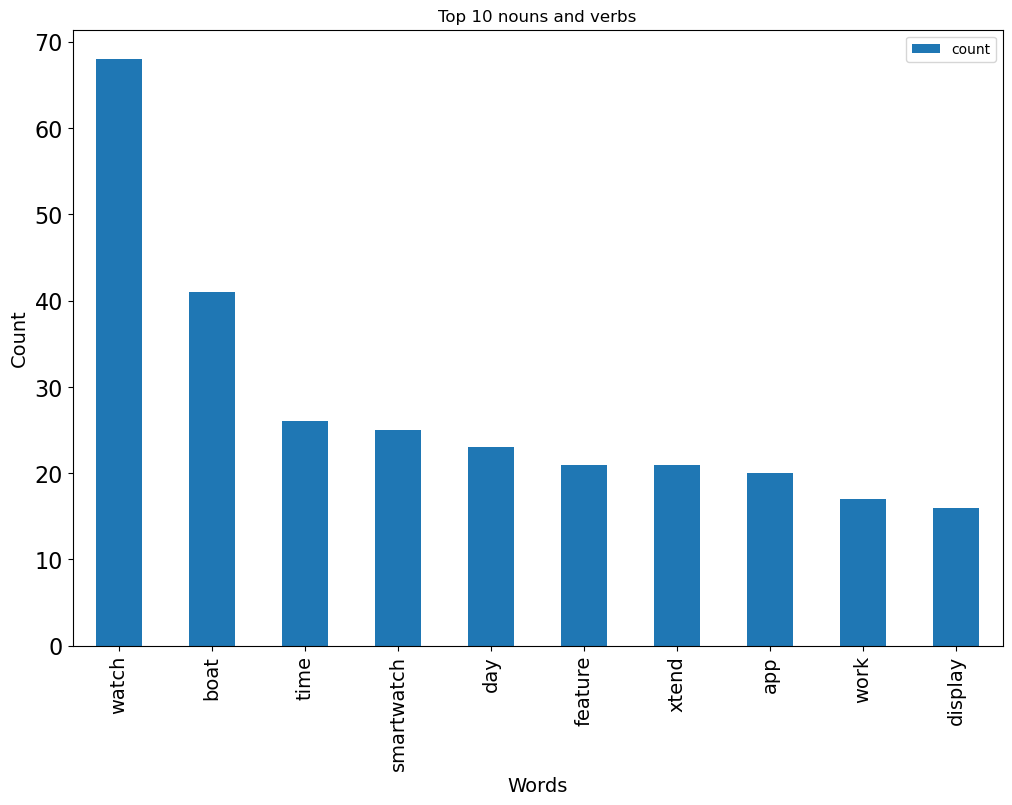

In [87]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs', fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# 9. Feature Extraction

# A. BOW Features

In [73]:
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# B. TF-IDF Features

In [74]:
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# 10. Fetch sentiments Using TextBlob

In [77]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [78]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

,count
Clean_Reviews,
pos,9
neg,1


# Let's calculate subjectivity and Polarity

In [79]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo...",0.472013,0.129274
1,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver...","[drawback, let, know, first, much, st, deliver...",0.506098,0.296569
2,great quality built feature good also waterpro...,it great quality built features good also wate...,"[great, quality, built, feature, good, also, w...",0.450000,0.500000
3,speaker sound nice many new thing upgraded ver...,speaker sound nice many new things upgraded ve...,"[speaker, sound, nice, many, new, thing, upgra...",0.588636,0.409091
4,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche...",0.427641,0.202171


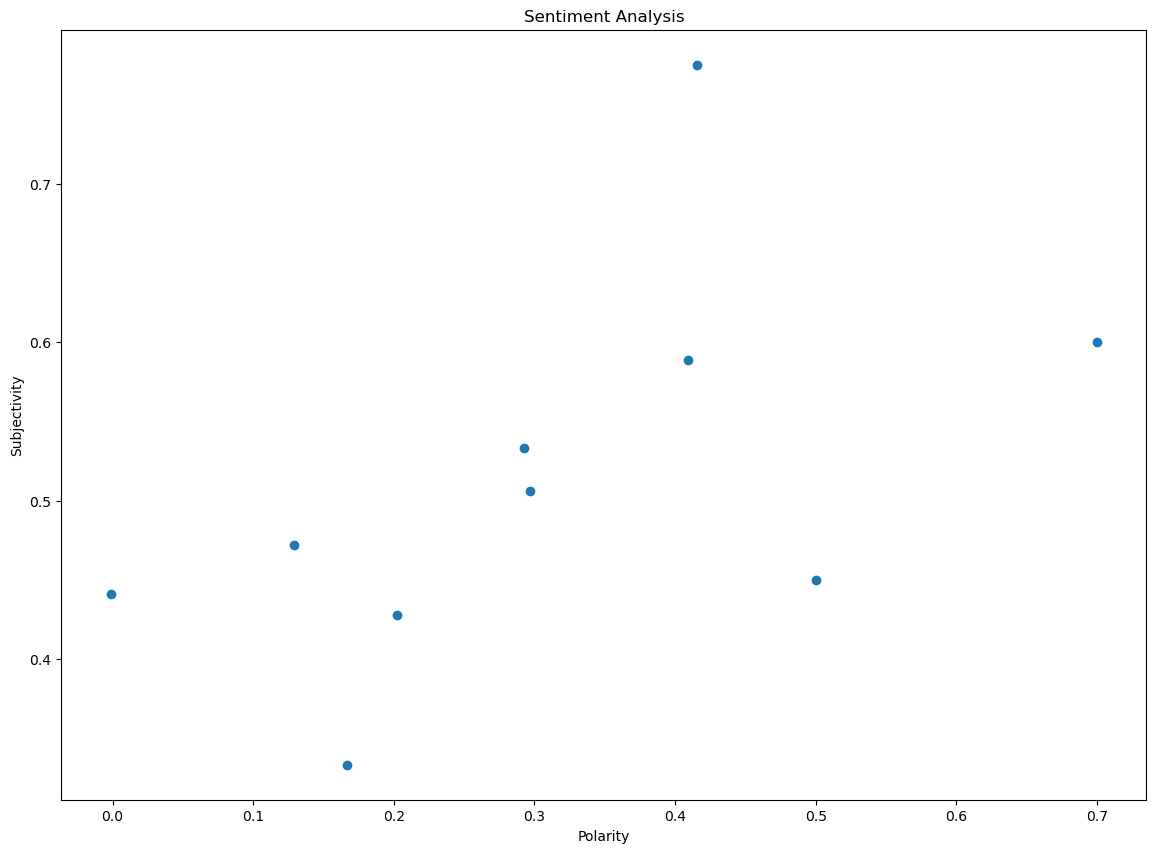

In [80]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [81]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity,sentiment
0,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo...",0.472013,0.129274,pos
1,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver...","[drawback, let, know, first, much, st, deliver...",0.506098,0.296569,pos
2,great quality built feature good also waterpro...,it great quality built features good also wate...,"[great, quality, built, feature, good, also, w...",0.450000,0.500000,pos
3,speaker sound nice many new thing upgraded ver...,speaker sound nice many new things upgraded ve...,"[speaker, sound, nice, many, new, thing, upgra...",0.588636,0.409091,pos
4,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche...",0.427641,0.202171,pos


# 11. Story Generation and Visualization

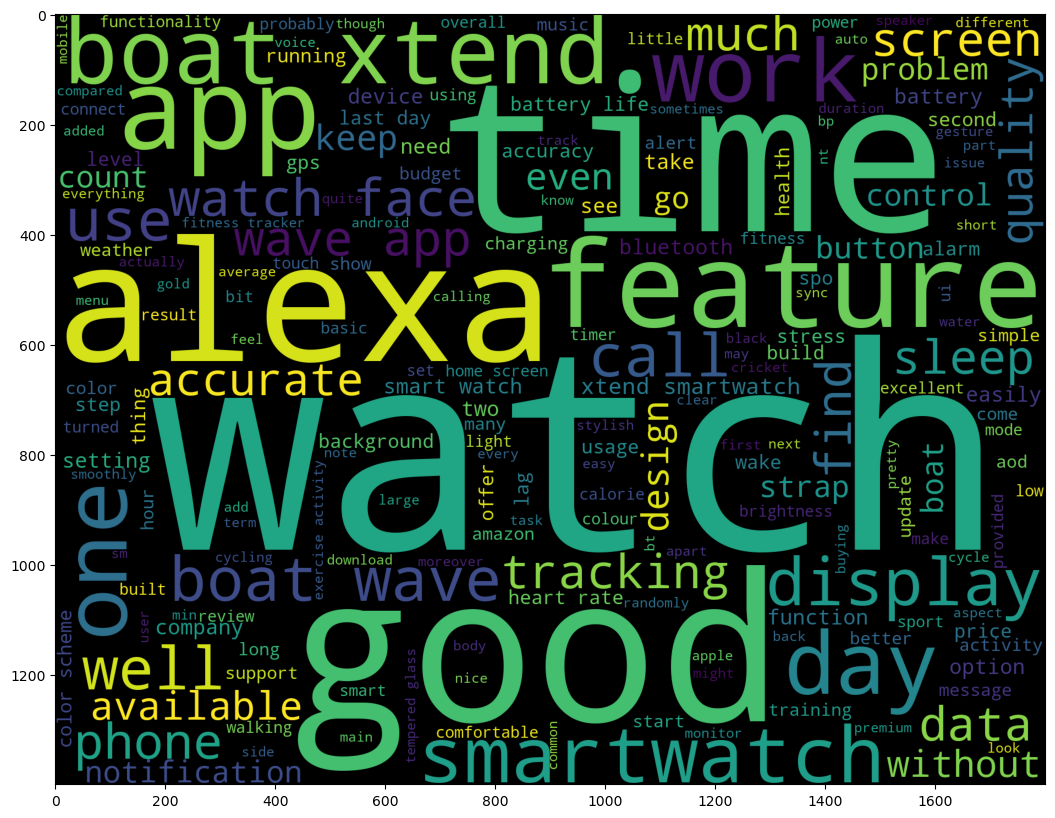

In [82]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

# A. Most common words in positive Review

In [83]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

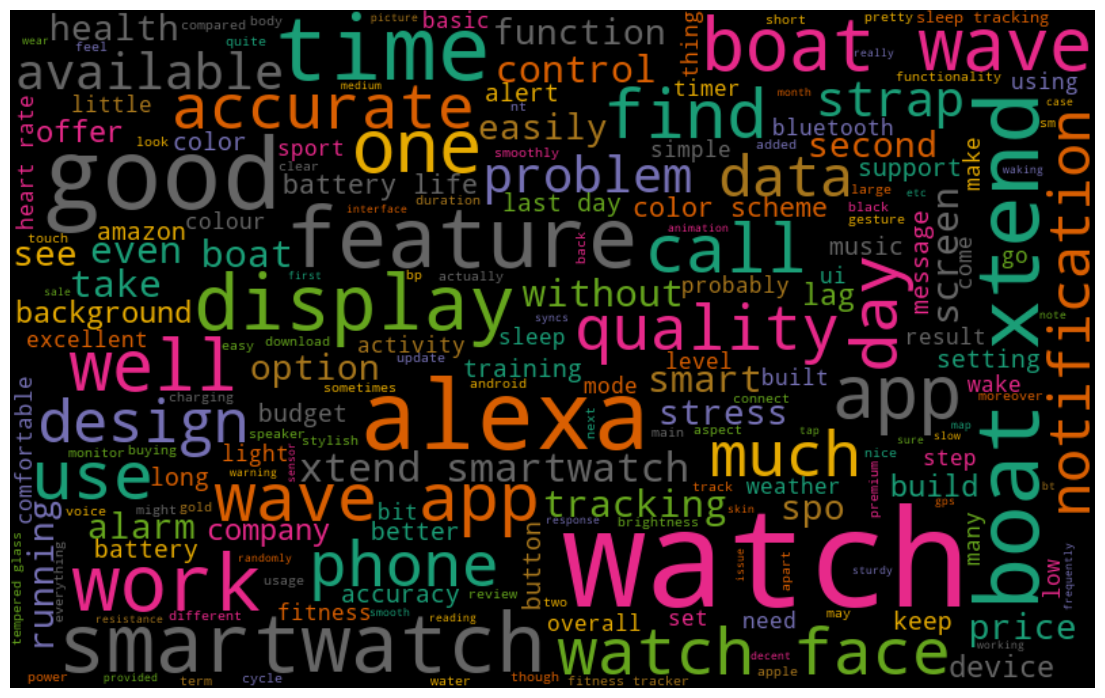

In [84]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

# B. Most common words in negative Review

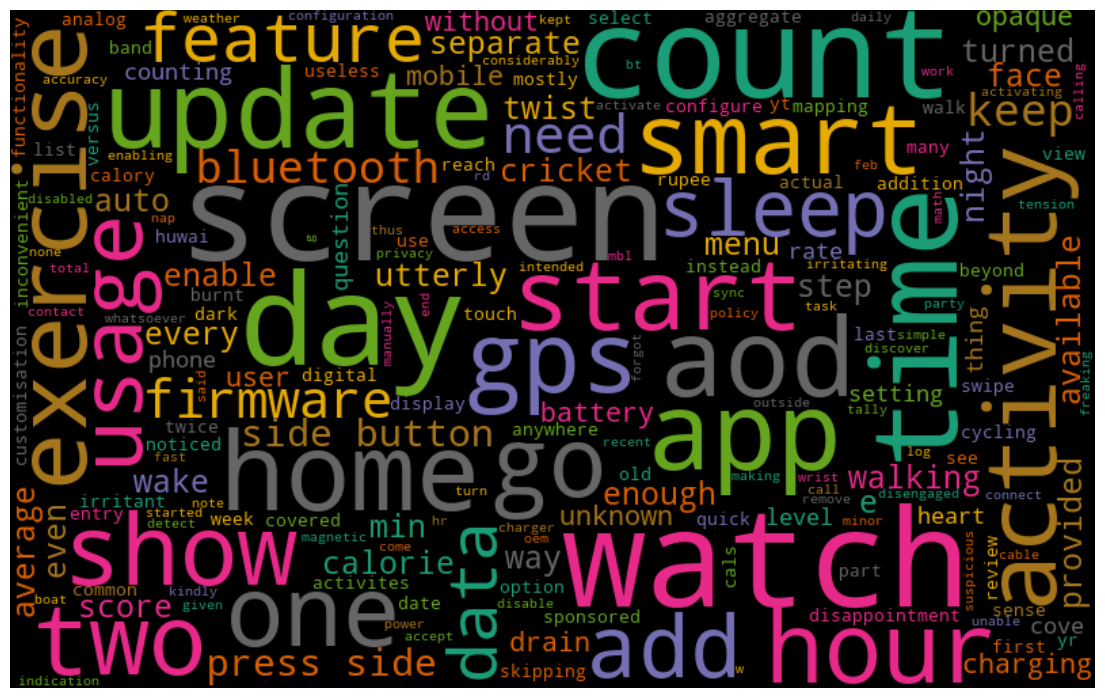

In [85]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)